In [1]:
import pandas as pd

In [2]:
d=pd.read_csv("tata_motors.csv")

In [3]:
d.shape

(733, 5)

In [4]:
d1=d[:701]

In [5]:
d1=d1["high"]

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
d1=scaler.fit_transform(np.array(d1).reshape(-1,1))

In [7]:
training_size=int(len(d1)*0.65)
test_size=len(d1)-training_size
train_data,test_data=d1[0:training_size,:],d1[training_size:len(d1),:1]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

In [9]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout

In [11]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.05))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
import tensorflow as tf
e_r=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=7, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=2,callbacks=[e_r])

Train on 354 samples, validate on 145 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
354/354 - 6s - loss: 0.2360 - val_loss: 0.0068
Epoch 2/100
354/354 - 2s - loss: 0.0407 - val_loss: 0.0209
Epoch 3/100
354/354 - 2s - loss: 0.0233 - val_loss: 0.0094
Epoch 4/100
354/354 - 2s - loss: 0.0174 - val_loss: 0.0359
Epoch 5/100
354/354 - 2s - loss: 0.0146 - val_loss: 0.0153
Epoch 6/100
354/354 - 2s - loss: 0.0104 - val_loss: 0.0113
Epoch 7/100
354/354 - 2s - loss: 0.0074 - val_loss: 0.0123
Epoch 8/100
354/354 - 2s - loss: 0.0044 - val_loss: 0.0056
Epoch 9/100
354/354 - 2s - loss: 0.0036 - val_loss: 0.0056
Epoch 10/100
354/354 - 2s - loss: 0.0031 - val_loss: 0.0045
Epoch 11/100
354/354 - 2s - loss: 0.0024 - val_loss: 0.0045
Epoch 12/100
354/354 - 2s - loss: 0.0026 - val_loss: 0.0045
Epoch 13/100
354/354 - 2s - loss: 0.0025 - val_loss: 0.0044
Epoch 14/100
354/354 - 2s - loss: 0.0026 - val_loss: 0.0044
Epoch 15/100
354/354 - 2s - l

In [15]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [16]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

293.39641419432337

In [18]:
math.sqrt(mean_squared_error(ytest,test_predict))

155.08527981803286

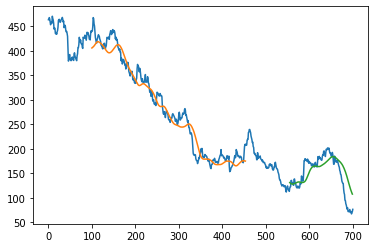

In [21]:
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = np.empty_like(d1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(d1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(d1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(d1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [38]:
x_input=test_data[146:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<32):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        print("*"*100)
        i=i+1
    

print(lst_output)

[[0.12948907911777496], [0.1308860182762146], [0.13225120306015015], [0.13358548283576965], [0.13488954305648804], [0.1361641138792038], [0.13740992546081543], [0.13862770795822144], [0.13981802761554718], [0.14098171889781952], [0.1421193927526474], [0.14323168992996216], [0.14431920647621155], [0.14538265764713287], [0.1464226394891739], [0.14743974804878235], [0.14843447506427765], [0.14940746128559113], [0.15035928785800934], [0.1512903869152069], [0.15220129489898682], [0.15309253334999084], [0.15396460890769958], [0.15481789410114288], [0.15565292537212372], [0.15647010505199432], [0.1572698950767517], [0.1580527126789093], [0.15881890058517456], [0.1595688760280609], [0.1603030413389206], [0.16102173924446106]]


In [42]:
scaler.inverse_transform(lst_output)

array([[119.19416634],
       [119.75832022],
       [120.30965009],
       [120.84849898],
       [121.37514369],
       [121.88987912],
       [122.39300012],
       [122.88480158],
       [123.36551217],
       [123.83546889],
       [124.29491848],
       [124.74411969],
       [125.18331325],
       [125.612788  ],
       [126.03278466],
       [126.44354395],
       [126.84526446],
       [127.23820494],
       [127.6226001 ],
       [127.99862445],
       [128.36649464],
       [128.72642129],
       [129.078609  ],
       [129.42320822],
       [129.7604356 ],
       [130.09045361],
       [130.41344881],
       [130.7295897 ],
       [131.03901468],
       [131.34189226],
       [131.63838492],
       [131.92863107]])